# Logistic Regression on Titanic Dataset

## Ingesting Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Visualization Libs
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data['Survived'].unique() #binary classification Problem

array([0, 1], dtype=int64)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

### Missing Values

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Try fill in missing values for Age Column ---> try mean
* Check the 2 missing values for embarked column---> try mean or mode
* drop cabin----> too many missing values

### Plots


<Axes: xlabel='Survived', ylabel='count'>

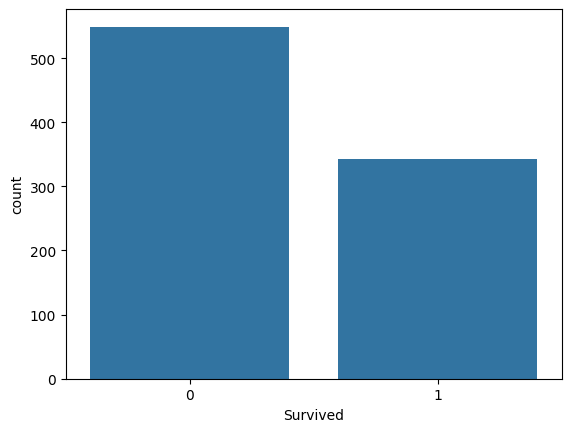

In [9]:
sns.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

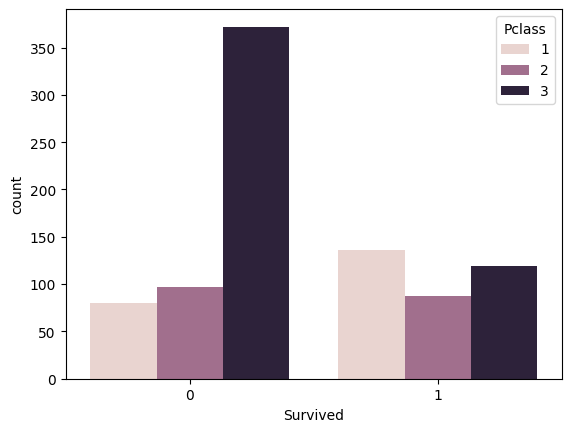

In [10]:
sns.countplot(x="Survived", hue="Pclass", data=data)

<Axes: xlabel='Survived', ylabel='count'>

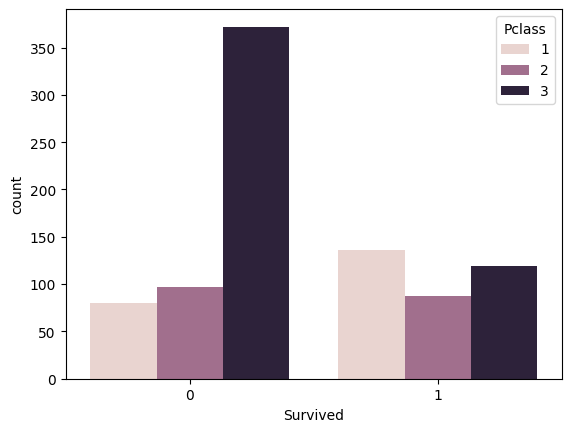

In [38]:
sns.countplot(x="Survived", hue="Pclass", data=data, hue_order=[1, 2, 3],)

<Axes: xlabel='Survived', ylabel='count'>

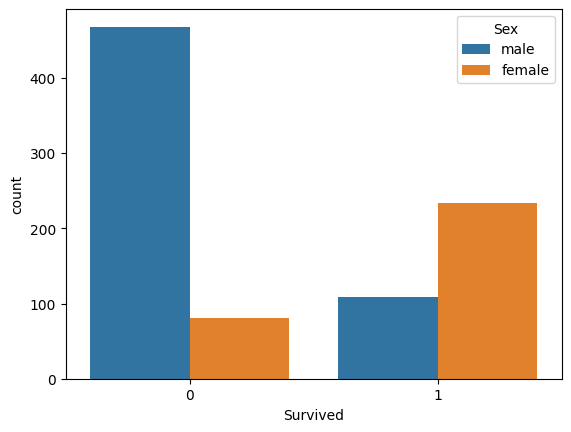

In [11]:
sns.countplot(x="Survived", hue="Sex", data=data)

<Axes: xlabel='Survived', ylabel='count'>

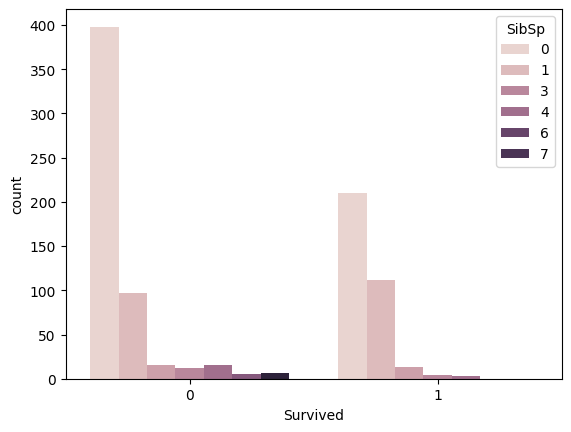

In [12]:
sns.countplot(x="Survived", hue="SibSp", data=data)

* Questions
* why more women survived?
* Why Passenger Class 1 survived more
* Breakdown of Male and female in each passenger class 

### Groupby with Pandas

. Why pclass1 survived


In [370]:
%pip install --upgrade pandas


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.groupby('Pclass')

In [16]:
#data.drop("Name",axis=1,inplace= True) 

In [17]:
# aggregate funtion --> sum
data.groupby('Pclass').sum()["Fare"]

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
data['Pclass'].dtype

dtype('int64')

In [21]:
data['Pclass'] = pd.to_numeric(data['Pclass'],errors='coerce')

In [22]:
# Check for NaN(Not a Number) values
print(data['Pclass'].isna().sum())

0


In [45]:
data.groupby('Pclass').sum()['Fare']

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [48]:
#data.groupby('Pclass').mean()['Fare']

In [47]:
data.groupby('Pclass').mean('Pclass')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [39]:
data.groupby('Pclass')

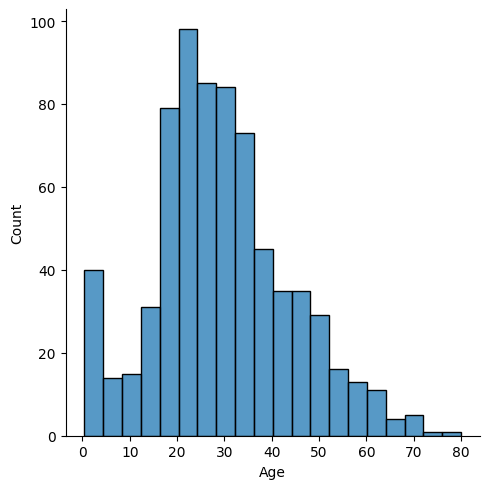

In [49]:
sns.displot(data["Age"])

In [50]:
groupby_pclass = data.groupby('Pclass')

In [55]:
groupby_pclass.mean("Pclass")

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550



* Pclass 1 are paying more than '2' which is more than '1'

In [58]:
data.groupby('Survived').mean('Survived')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### Filling in missing values

In [74]:
new_data = data.copy()

In [75]:
new_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Fill in Age 


In [62]:
new_data["Age"].mean()

29.69911764705882

In [78]:
new_data.fillna(data['Age'].mean())["Age"].isna().sum()  ##fill na is the particular column

0

In [76]:
new_data['Age'].fillna(data['Age'].mean(),inplace=True)

C:\Users\oyeog\AppData\Local\Temp\ipykernel_9720\988994299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Age'].fillna(data['Age'].mean(),inplace=True)


In [77]:
new_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop Cabin column and embarked also

In [79]:
new_data.drop("Cabin", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [81]:
new_data.drop("Cabin", axis=1, inplace=True)

In [82]:
new_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [83]:
new_data.dropna(axis=0, inplace=True)

In [84]:
new_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encoding

In [85]:
new_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [86]:
new_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [87]:
new_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [88]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
new_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [371]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
encoder = LabelEncoder()  #initializing the labelEncoder

In [96]:
encoder

LabelEncoder()

In [97]:
new_data['new_embarked']= encoder.fit_transform(new_data['Embarked'])

In [98]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


In [103]:
new_data[["Embarked", "new_embarked"]]

,Embarked,new_embarked
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2
...,...,...
886,S,2
887,S,2
888,S,2
889,C,0


In [104]:
#Sex Column
new_data['new_sex']= encoder.fit_transform(new_data['Sex'])

In [105]:
new_data[["Sex", "new_sex"]]

,Sex,new_sex
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


In [106]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_embarked,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,1


##### One-hot encoding

In [274]:
from sklearn.preprocessing import OneHotEncoder

In [263]:
#onehot = OneHotEncoder()

In [275]:
onehot = OneHotEncoder(handle_unknown='ignore')

In [276]:
X = [['male', 1], ['female', 3], ['female', 2]]

In [277]:
onehot.fit(X)


OneHotEncoder(handle_unknown='ignore')

In [380]:
#onehot.transform(new_data['Sex'])

In [266]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  new_embarked  889 non-null    int32  
 12  new_sex       889 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 90.3+ KB


In [259]:
#pd.get_dummies()
sex_col = pd.get_dummies(new_data['Sex'])

In [260]:
sex_col

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [61]:
#create a function
#take in Passenger class and their age mean

Create a function

## Model Training

### Split Data


In [109]:
new_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_embarked', 'new_sex'],
      dtype='object')

In [418]:
# features /independent Varr
X = new_data[['Pclass', 'Age','new_embarked', 'new_sex', 'Fare' #,'SibSp','Parch'
              ]]
# label/dependent varr
y = new_data['Survived']


#<---70 and 30----->

#### Train_test_split

In [419]:
#70% train - 30% test

from sklearn.model_selection import train_test_split

In [420]:
#tuple unpacking

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=401)

In [421]:

X_train.shape,  y_train.shape, y_test.shape, X_test.shape


((622, 5), (622,), (267,), (267, 5))

In [422]:
X_train

,Pclass,Age,new_embarked,new_sex,Fare
876,3,20.000000,2,1,9.8458
284,1,29.699118,2,1,26.0000
336,1,29.000000,2,1,66.6000
594,2,37.000000,2,1,26.0000
418,2,30.000000,2,1,13.0000
...,...,...,...,...,...
231,3,29.000000,2,1,7.7750
865,2,42.000000,2,0,13.0000
618,2,4.000000,2,0,39.0000
712,1,48.000000,2,1,52.0000


In [423]:
y_test

740    1
811    0
32     1
176    0
869    1
      ..
806    0
409    0
230    1
256    1
288    1
Name: Survived, Length: 267, dtype: int64

In [424]:
y_train

876    0
284    0
336    0
594    0
418    0
      ..
231    0
865    1
618    1
712    1
369    1
Name: Survived, Length: 622, dtype: int64

In [425]:
X_test

,Pclass,Age,new_embarked,new_sex,Fare
740,1,29.699118,2,1,30.0000
811,3,39.000000,2,1,24.1500
32,3,29.699118,1,0,7.7500
176,3,29.699118,2,1,25.4667
869,3,4.000000,2,1,11.1333
...,...,...,...,...,...
806,1,39.000000,2,1,0.0000
409,3,29.699118,2,0,25.4667
230,1,35.000000,2,0,83.4750
256,1,29.699118,0,0,79.2000


### Train Logistic Regression Model

In [426]:
from sklearn.linear_model import LogisticRegression

In [427]:
logistic_model = LogisticRegression() #initialize

In [428]:
#train the model on X_train , y_train
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [429]:
# Feature       labels/examples --> supervised                      unsupervised type -> no examples
#.fit(X_train, y_train)                                                  ---> .fit(X_train)

In [430]:
#predicting the data
# .predict
predictions = logistic_model.predict(X_test) 


In [431]:
predictions

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [432]:
len(predictions)

267

In [433]:
pred_df = pd.DataFrame(y_test) #y_test -> true labels

In [434]:
pred_df['predictions']= predictions

In [435]:
pred_df

,Survived,predictions
740,1,0
811,0,0
32,1,1
176,0,0
869,1,0
...,...,...
806,0,0
409,0,1
230,1,1
256,1,1


## Logistic Model Evaluation

In [436]:
from sklearn.metrics import median_absolute_error, confusion_matrix, classification_report, accuracy_score

In [437]:
accuracy = accuracy_score(y_test, predictions)

In [438]:
accuracy

0.8014981273408239

In [439]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       160
           1       0.75      0.77      0.76       107

    accuracy                           0.80       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.80      0.80      0.80       267



In [440]:
print(confusion_matrix(y_test, predictions))

[[132  28]
 [ 25  82]]


## Model Saving 

In [441]:
"""import joblib
model_file = 'logistic_regression_5_features.pkl'
joblib.dump(logistic_model, model_file)
print(f'model saved as: {model_file}')"""

"import joblib\nmodel_file = 'logistic_regression_5_features.pkl'\njoblib.dump(logistic_model, model_file)\nprint(f'model saved as: {model_file}')"

In [442]:
load_up_logistic_model = joblib.load('logistic_regression_5_features.pkl')
#load_up_logistic_model = joblib.load('logistic_regression_7_features.pkl')

In [443]:
new_predictions = load_up_logistic_model.predict(X_test)

In [444]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       160
           1       0.75      0.77      0.76       107

    accuracy                           0.80       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.80      0.80      0.80       267



In [445]:
new_predictions

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [446]:
pred_df = pd.DataFrame(y_test) #y_test -> true labels

pred_df["prediction_values"] = new_predictions

pred_df


,Survived,prediction_values
740,1,0
811,0,0
32,1,1
176,0,0
869,1,0
...,...,...
806,0,0
409,0,1
230,1,1
256,1,1


In [447]:
X.iloc[1]

Pclass           1.0000
Age             38.0000
new_embarked     0.0000
new_sex          0.0000
Fare            71.2833
Name: 1, dtype: float64

In [448]:
#np.array(X.iloc[1])

In [449]:
# predict index 1
#load_up_logistic_model.predict(np.array(X.iloc[1]).reshape(1, -1))